In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [40]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [41]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [42]:
# Check the values in the object columns
for column in df.columns.tolist():
    if df[column].dtype not in ['int64', 'float64']:
        display(df[column].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [43]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [44]:
null_rows = df[df['bmi'].isnull()]
value_counts_null_rows = null_rows['stroke'].value_counts()
value_counts_null_rows

stroke
0    161
1     40
Name: count, dtype: int64

In [45]:
df = df.dropna(subset=['bmi'])
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [46]:
df = df[df['gender'] != 'Other']
for column in df.columns.tolist():
    if df[column].dtype not in ['int64', 'float64']:
        display(df[column].value_counts())

gender
Female    2897
Male      2011
Name: count, dtype: int64

ever_married
Yes    3204
No     1704
Name: count, dtype: int64

work_type
Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

Residence_type
Urban    2490
Rural    2418
Name: count, dtype: int64

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: count, dtype: int64

In [47]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

In [48]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

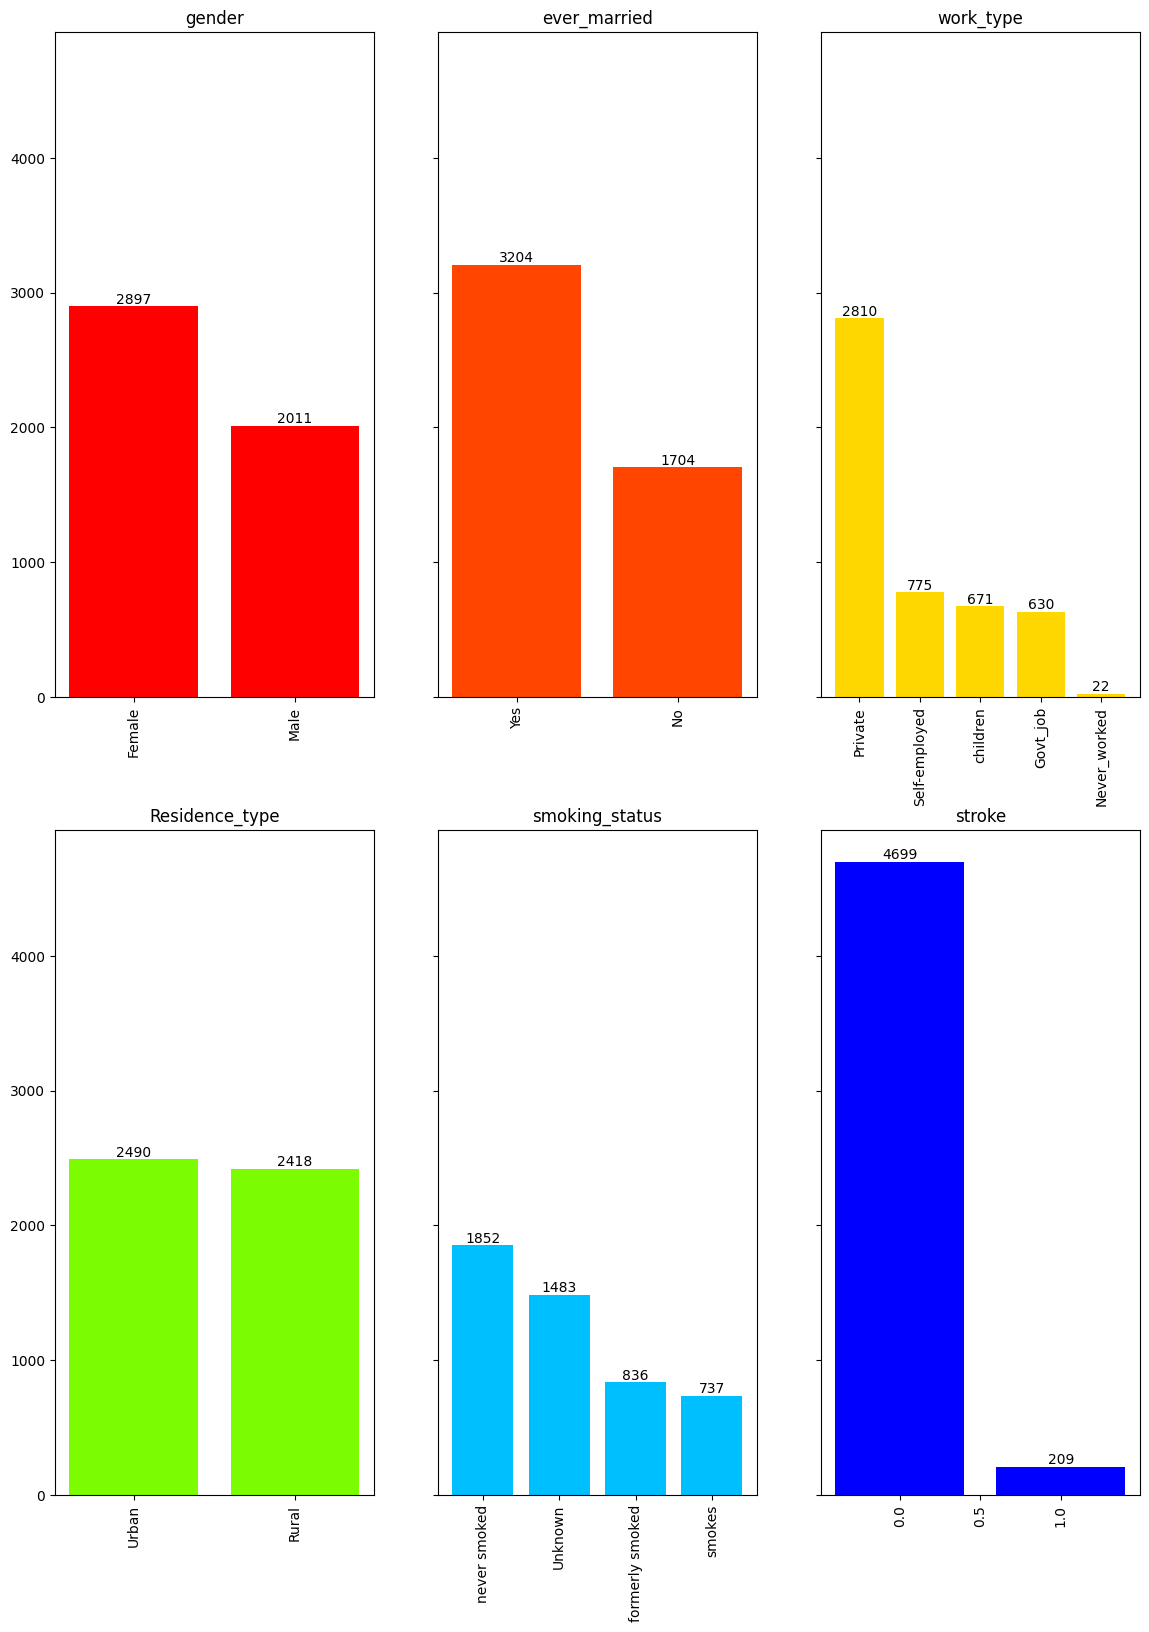

In [49]:
colors = ['red', 'orangered', 'gold', 'lawngreen', 'deepskyblue', 'blue']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 19), sharey=True)
for i, column in enumerate(categorical_columns):
    plt.subplot(2, 3, i+1)
    value_counts = df[column].value_counts()
    bars = plt.bar(value_counts.index, value_counts, color=colors[i])
    plt.bar_label(bars, fmt='%d', label_type='edge', fontsize=10)
    plt.xticks(rotation=90)
    plt.title(column)

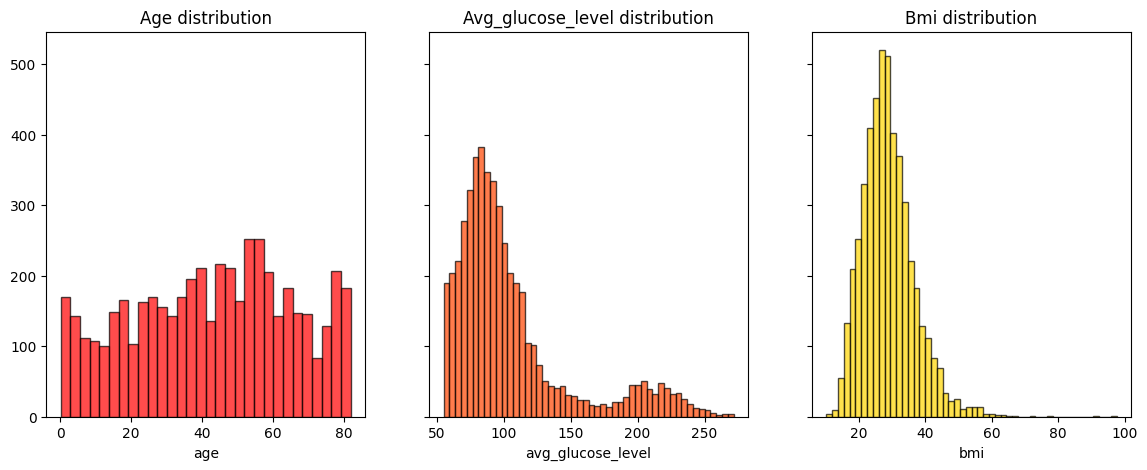

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5), sharey=True)
for i, column in enumerate(numerical_columns):
    plt.subplot(1, 3, i+1)
    plt.hist(df[column], bins=30 if i == 0 else 50, edgecolor='black', alpha=0.7, color=colors[i])
    plt.title(f'{column.capitalize()} distribution')
    plt.xlabel(column)
    
plt.show()

In [51]:
df = df.drop('id', axis=1)
for column in df.columns:
    if df[column].dtype not in ['int64', 'float64']:
        df.loc[:, column] = label_encoder.fit_transform(df[column])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


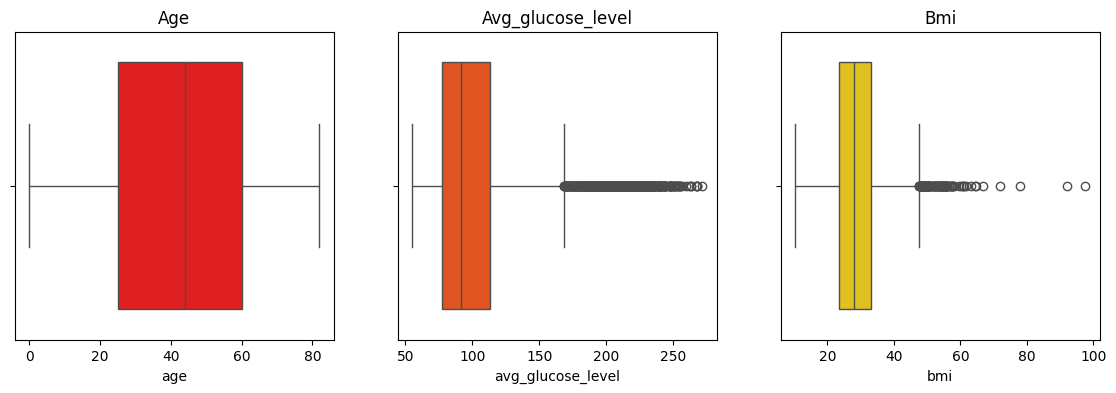

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4), sharey=True)
for i, column in enumerate(numerical_columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[column], color=colors[i])
    plt.title(f'{column.capitalize()}')
    plt.xlabel(column)

plt.show()

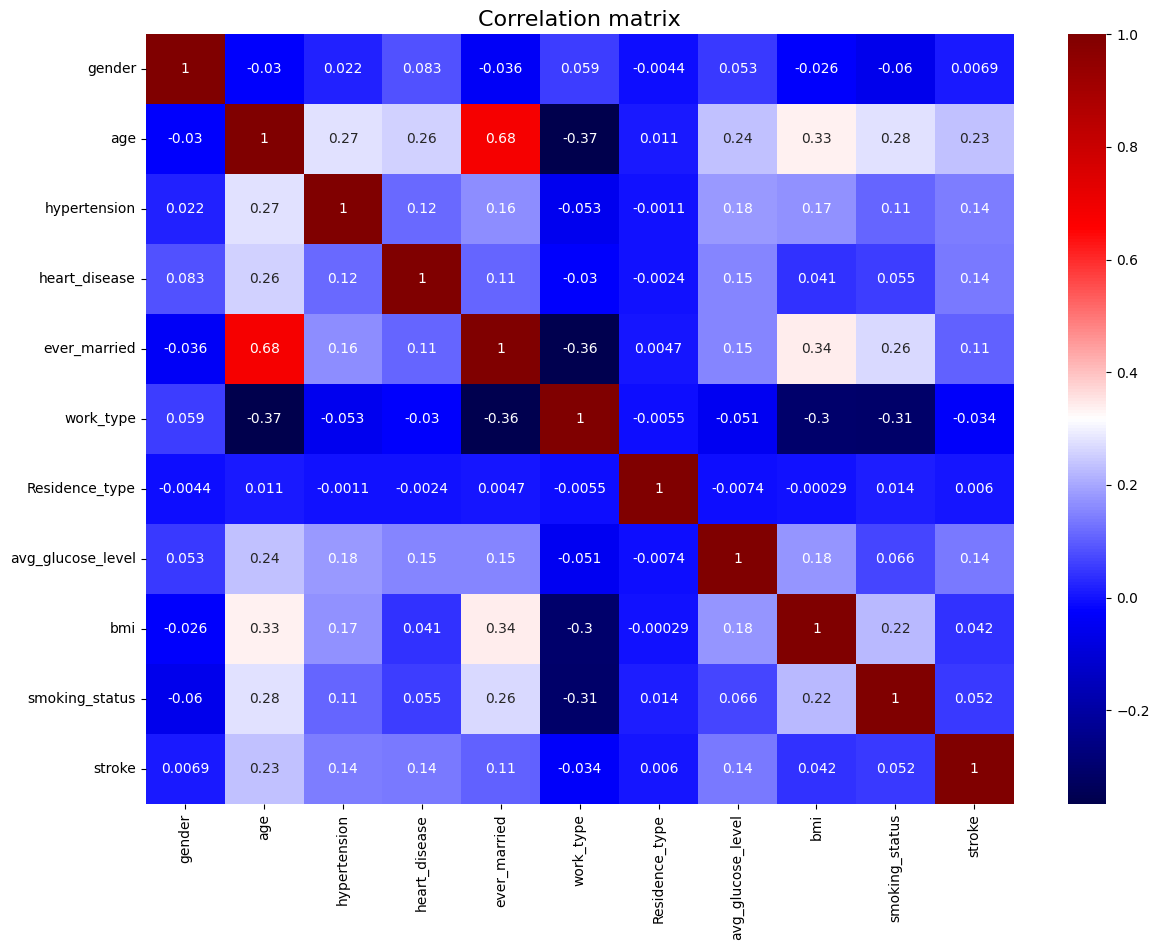

In [53]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
plt.title('Correlation matrix', fontsize=16)
sns.heatmap(correlation_matrix, annot=True, cmap='seismic')
plt.show()

IsolationForest()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000
mean,42.116853,0.082729,0.046154,103.720255,28.995791,0.006967
std,22.127873,0.275512,0.209849,42.943968,7.998689,0.083187
min,0.160000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,76.560000,23.500000,0.000000
50%,43.000000,0.000000,0.000000,90.690000,28.100000,0.000000
75%,59.000000,0.000000,0.000000,112.340000,33.300000,0.000000
max,82.000000,1.000000,1.000000,267.760000,97.600000,1.000000


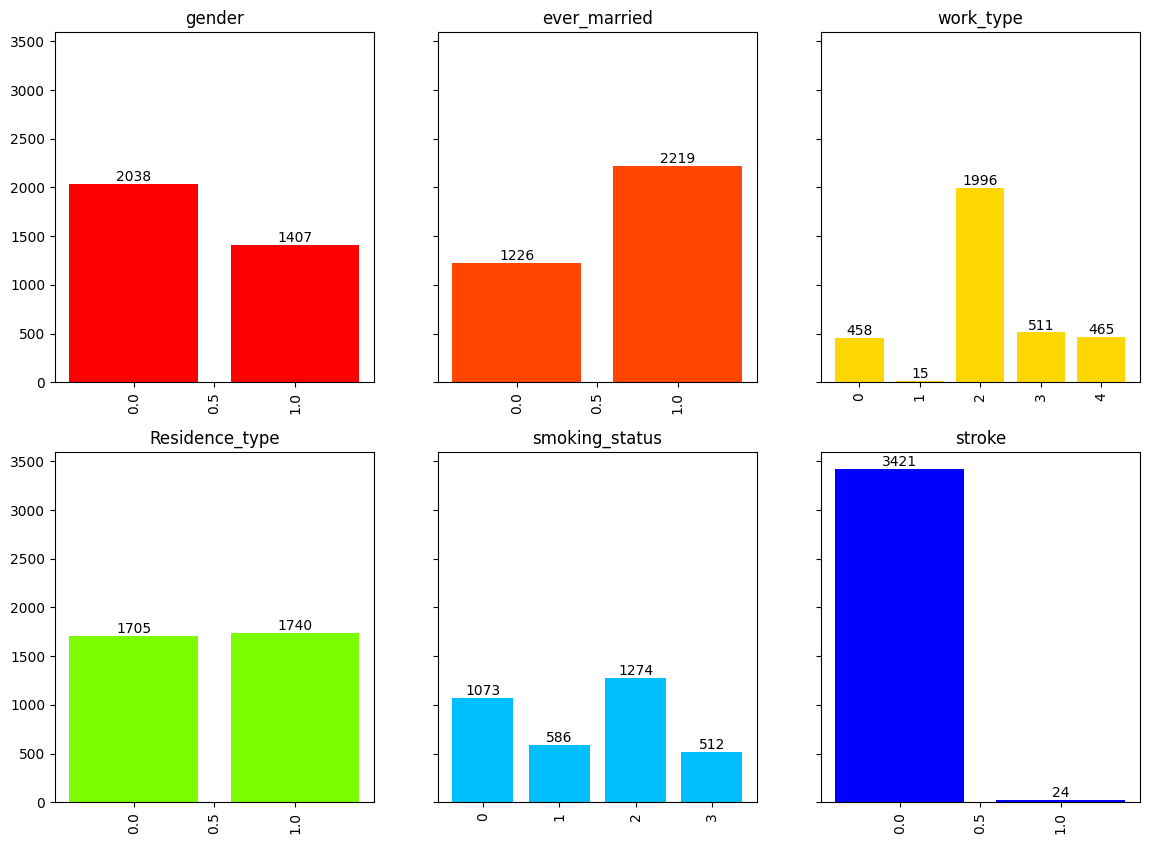

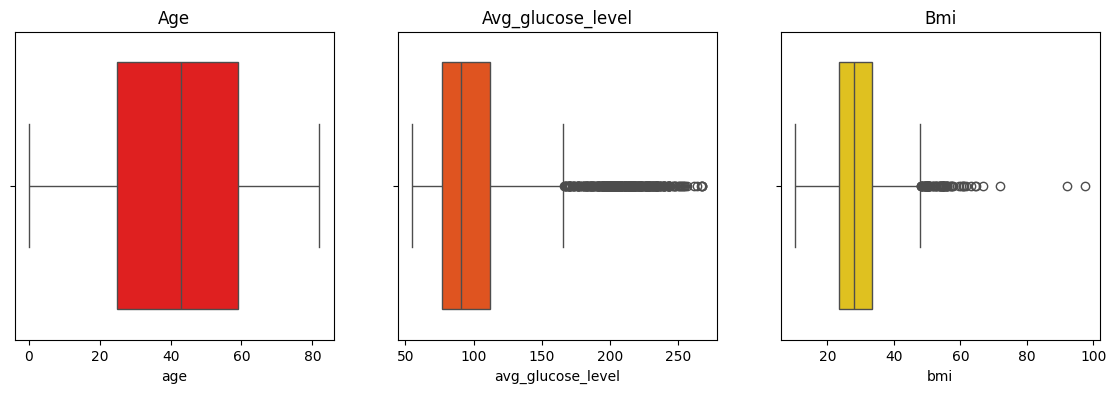

LocalOutlierFactor()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4874.00000
mean,42.883898,0.091711,0.049651,105.319577,28.909581,0.04247
std,22.555115,0.288647,0.217246,44.433923,7.854915,0.20168
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.00000
25%,25.000000,0.000000,0.000000,77.045000,23.600000,0.00000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.00000
75%,60.000000,0.000000,0.000000,113.545000,33.100000,0.00000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.00000


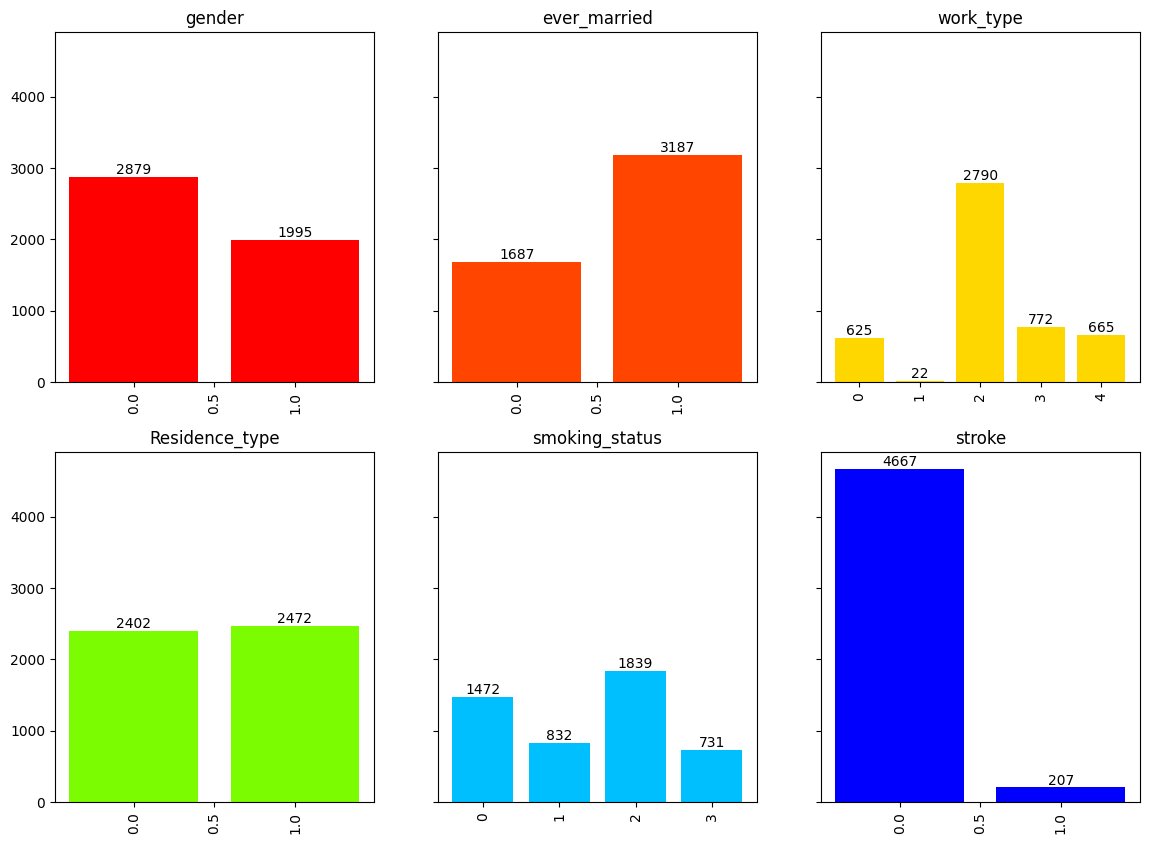

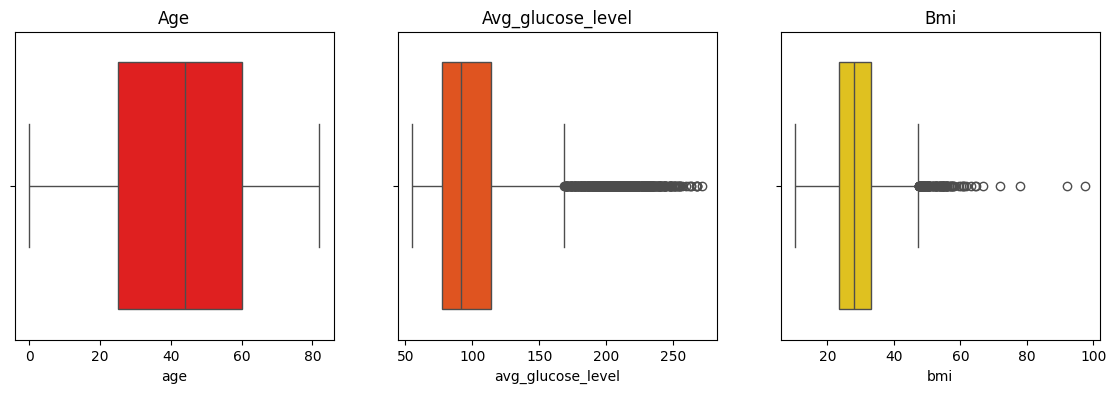

EllipticEnvelope()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,42.708690,0.089908,0.049899,105.011908,28.895325,0.034615
std,22.517642,0.286082,0.217760,44.081103,7.925647,0.182822
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.040000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.450000,28.000000,0.000000
75%,60.000000,0.000000,0.000000,113.250000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


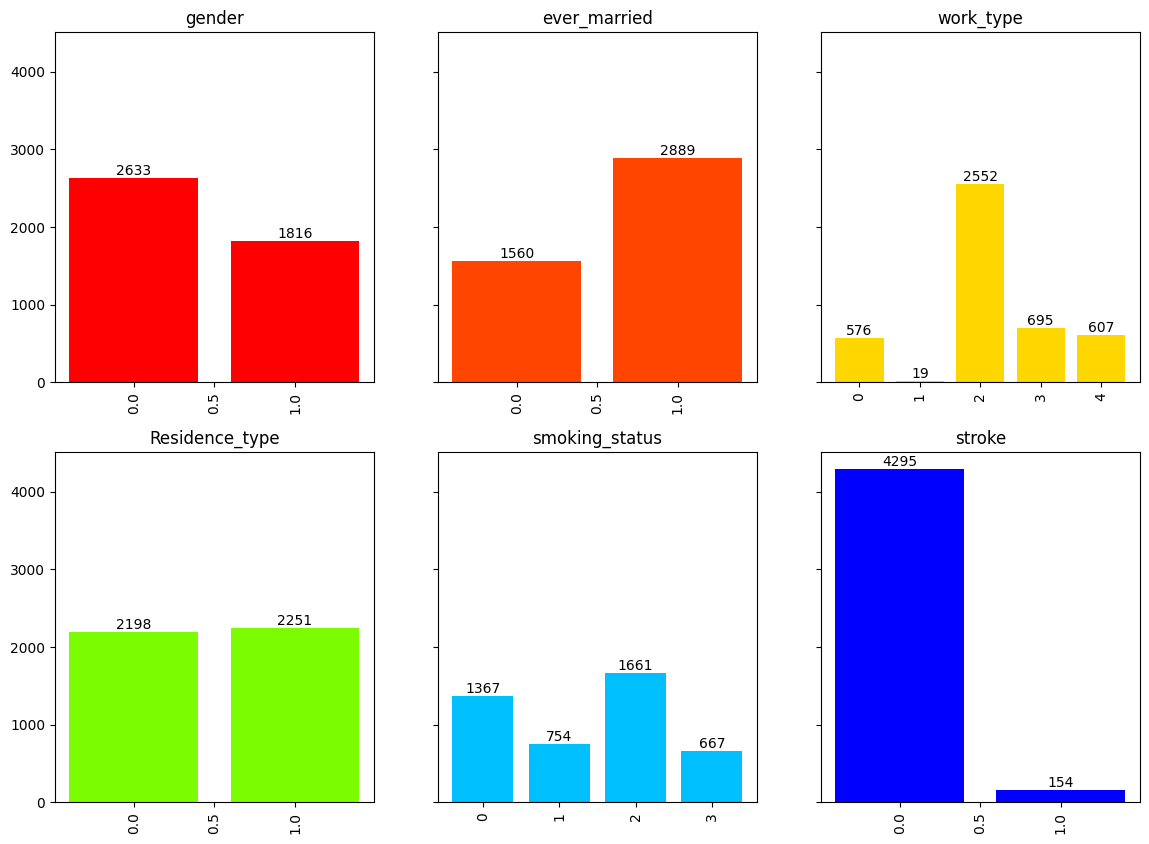

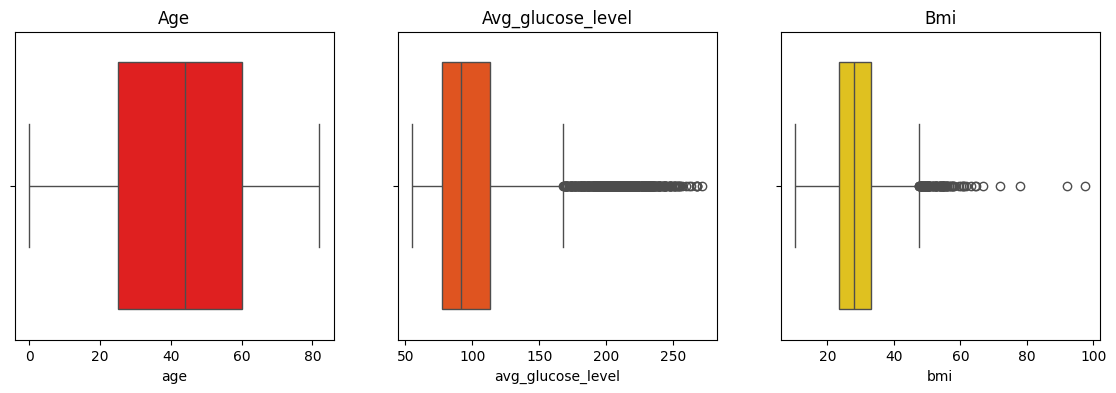

OneClassSVM(gamma='auto')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000
mean,42.806411,0.091527,0.052358,105.103901,28.963549,0.032374
std,22.480953,0.288414,0.222793,44.060085,7.964178,0.177027
min,0.080000,0.000000,0.000000,55.270000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,76.922500,23.600000,0.000000
50%,44.000000,0.000000,0.000000,91.620000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.142500,33.075000,0.000000
max,82.000000,1.000000,1.000000,267.610000,97.600000,1.000000


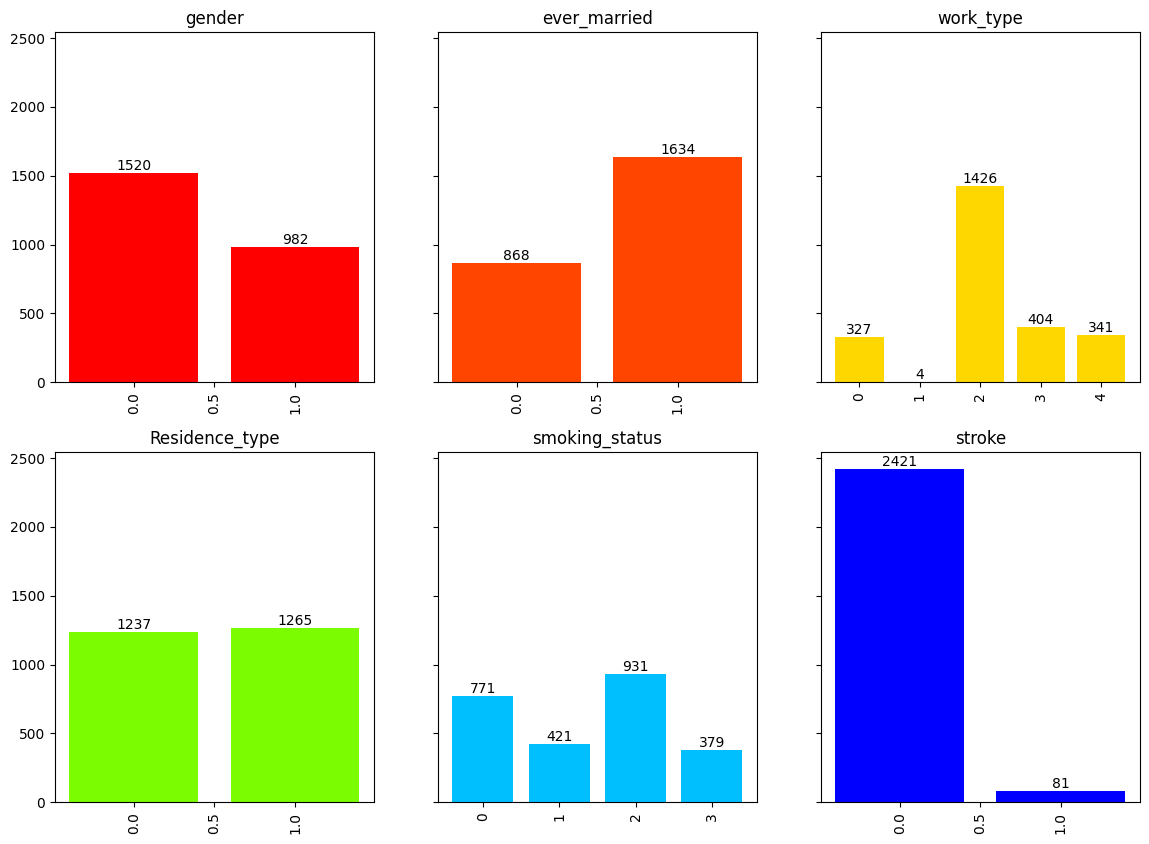

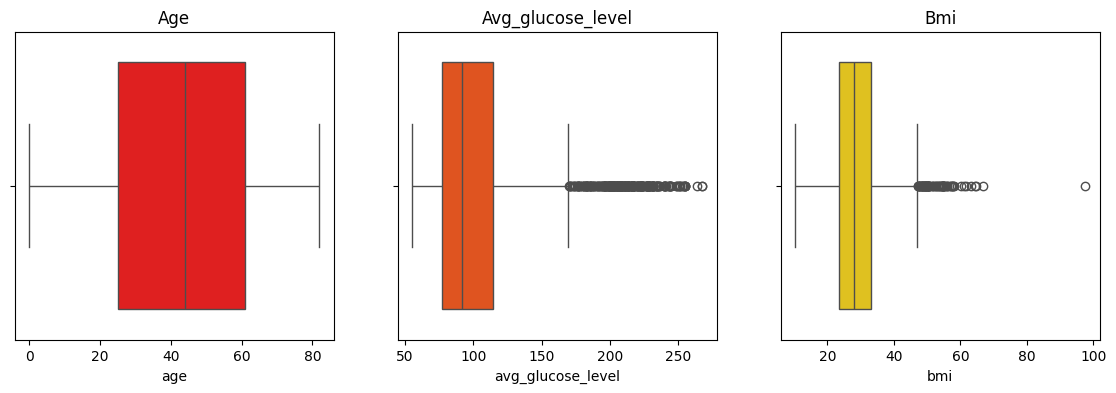

In [54]:
outlier_detection_models = [IsolationForest(), LocalOutlierFactor(), EllipticEnvelope(), OneClassSVM(gamma='auto')]

for model in outlier_detection_models:
    display(model)
    df['outlier']=pd.Series(model.fit_predict(df.values))
    df_cleaned=df[df.outlier!=-1]
    df_cleaned = df_cleaned.drop(['outlier'], axis=1)
    df = df.drop(['outlier'], axis=1)
    display(df_cleaned.describe())

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10), sharey=True)
    for i, column in enumerate(categorical_columns):
        plt.subplot(2, 3, i+1)
        value_counts = df_cleaned[column].value_counts()
        bars = plt.bar(value_counts.index, value_counts, color=colors[i])
        plt.bar_label(bars, fmt='%d', label_type='edge', fontsize=10)
        plt.xticks(rotation=90)
        plt.title(column)
    plt.show()

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4), sharey=True)
    
    for i, column in enumerate(numerical_columns):
        plt.subplot(1, 3, i+1)
        sns.boxplot(x=df_cleaned[column], color=colors[i])
        plt.title(f'{column.capitalize()}')
        plt.xlabel(column)
    
    plt.show()

In [55]:
df['outlier']=pd.Series(LocalOutlierFactor().fit_predict(df.values))
df_cleaned=df[df.outlier!=-1]
df_cleaned = df_cleaned.drop(['outlier'], axis=1)
df = df.drop(['outlier'], axis=1)
display(df_cleaned.describe())
X = df_cleaned.drop('stroke', axis=1)
y = df_cleaned['stroke']

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4874.00000
mean,42.883898,0.091711,0.049651,105.319577,28.909581,0.04247
std,22.555115,0.288647,0.217246,44.433923,7.854915,0.20168
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.00000
25%,25.000000,0.000000,0.000000,77.045000,23.600000,0.00000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.00000
75%,60.000000,0.000000,0.000000,113.545000,33.100000,0.00000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.00000


In [56]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1


In [57]:
X = scaler.fit_transform(X)
df_standartized = pd.DataFrame(X, columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'])
df_standartized

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.201294,1.069317,-0.317760,4.374985,0.727556,-0.155937,0.985740,2.776777,0.979159,-0.351704
1,1.201294,1.645742,-0.317760,4.374985,0.727556,-0.155937,-1.014467,0.013514,0.457139,0.585532
2,-0.832436,0.271190,-0.317760,-0.228572,0.727556,-0.155937,0.985740,1.483488,0.699050,1.522768
3,-0.832436,1.601402,3.147031,-0.228572,0.727556,0.759768,-1.014467,1.548535,-0.625097,0.585532
4,1.201294,1.690083,-0.317760,-0.228572,0.727556,-0.155937,0.985740,1.820652,0.011512,-0.351704
...,...,...,...,...,...,...,...,...,...,...
4869,-0.832436,-1.325064,-0.317760,-0.228572,-1.374464,1.675473,-1.014467,-0.050408,-1.312635,-1.288940
4870,-0.832436,1.690083,-0.317760,-0.228572,0.727556,0.759768,0.985740,0.447461,1.412053,0.585532
4871,-0.832436,-0.349575,-0.317760,-0.228572,0.727556,0.759768,-1.014467,-0.502586,0.215227,0.585532
4872,1.201294,0.359871,-0.317760,-0.228572,0.727556,-0.155937,-1.014467,1.372300,-0.421382,-0.351704


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


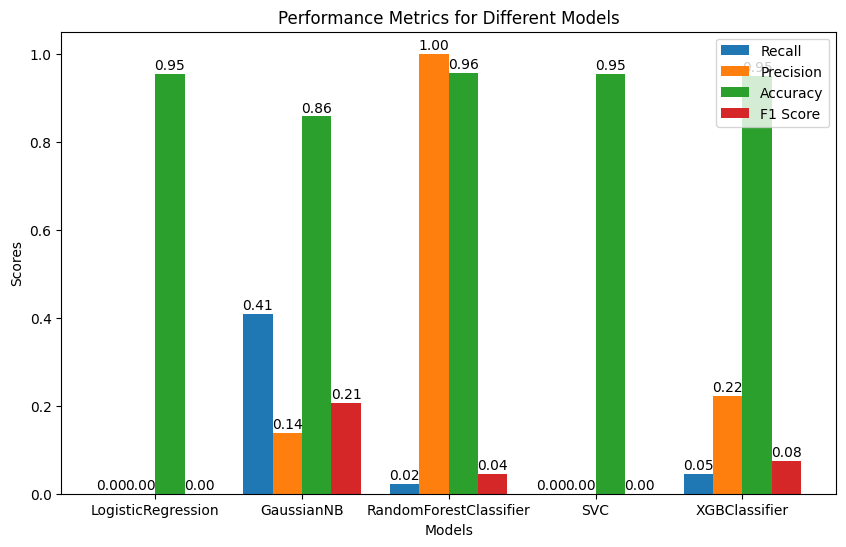

In [58]:
models = [LogisticRegression(), GaussianNB(), RandomForestClassifier(), svm.SVC(), xgb.XGBClassifier()]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

metrics_names = ['Recall', 'Precision', 'Accuracy', 'F1 Score']
metrics_values = {'Recall': [], 'Precision': [], 'Accuracy': [], 'F1 Score': []}

for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    rc = recall_score(y_test, y_pred)
    pc = precision_score(y_test, y_pred)
    acs = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics_values['Recall'].append(rc)
    metrics_values['Precision'].append(pc)
    metrics_values['Accuracy'].append(acs)
    metrics_values['F1 Score'].append(f1)

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(models))

for i, metric in enumerate(metrics_names):
    ax.bar(index + i * bar_width, metrics_values[metric], bar_width, label=metric)
    for j, value in enumerate(metrics_values[metric]):
        ax.text(index[j] + i * bar_width, value + 0.01, f'{value:.2f}', ha='center')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels([model.__class__.__name__ for model in models])
ax.legend()

plt.show()

Best hyperparameters: {'C': 1, 'class_weight': {0: 1, 1: 7}, 'max_iter': 100}


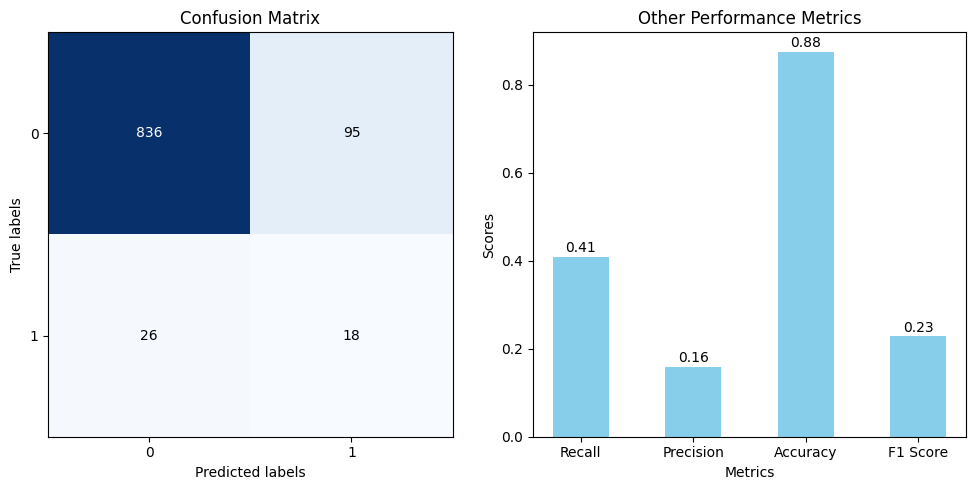

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'class_weight': ['balanced', {0: 1, 1: 9}, {0: 1, 1: 24}, {0: 1, 1: 2}, {0: 1, 1: 5}, {0: 1, 1: 6}, {0: 1, 1: 7}],
    'max_iter': [100, 200, 400, 500, 600, 800, 1000, 2000]
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rc = recall_score(y_test, y_pred)
pc = precision_score(y_test, y_pred)
acs = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
axes[0].imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')
classes = ['0', '1']
ticks = np.arange(len(classes))
axes[0].set_xticks(ticks)
axes[0].set_yticks(ticks)
axes[0].set_xticklabels(classes)
axes[0].set_yticklabels(classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        axes[0].text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center",
                     color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

# Other Metrics Plot
metrics_names = ['Recall', 'Precision', 'Accuracy', 'F1 Score']
metrics_values = [rc, pc, acs, f1]

bar_width = 0.5
index = np.arange(len(metrics_names))

axes[1].bar(index, metrics_values, bar_width, color='skyblue')
for i, value in enumerate(metrics_values):
    axes[1].text(i, value + 0.01, f'{value:.2f}', ha='center')

axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Scores')
axes[1].set_title('Other Performance Metrics')
axes[1].set_xticks(index)
axes[1].set_xticklabels(metrics_names)

plt.tight_layout()
plt.show()

Best hyperparameters: {'var_smoothing': 1e-09}


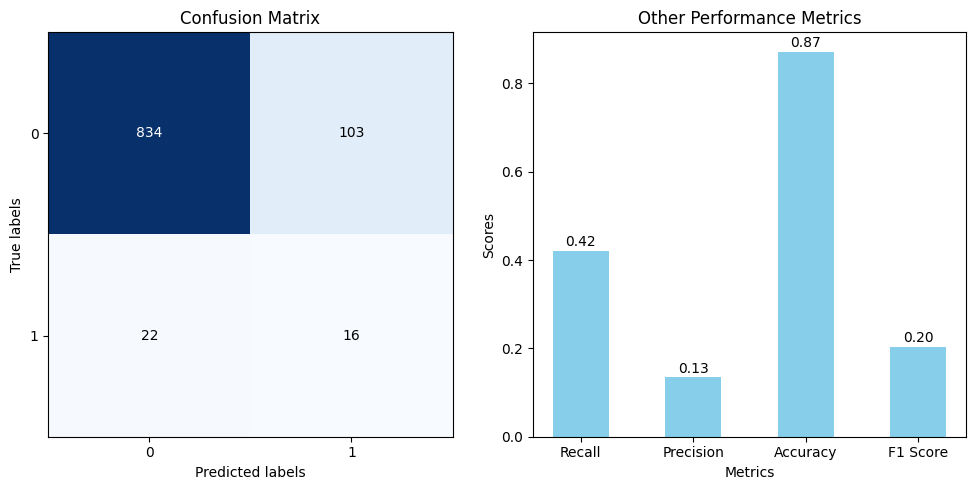

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)
param_grid = {
    'var_smoothing': [1e-9, 1e-7, 1e-6, 1e-11, 1e-14]
}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rc = recall_score(y_test, y_pred)
pc = precision_score(y_test, y_pred)
acs = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
axes[0].imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')
classes = ['0', '1']
ticks = np.arange(len(classes))
axes[0].set_xticks(ticks)
axes[0].set_yticks(ticks)
axes[0].set_xticklabels(classes)
axes[0].set_yticklabels(classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        axes[0].text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center",
                     color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

# Other Metrics Plot
metrics_names = ['Recall', 'Precision', 'Accuracy', 'F1 Score']
metrics_values = [rc, pc, acs, f1]

bar_width = 0.5
index = np.arange(len(metrics_names))

axes[1].bar(index, metrics_values, bar_width, color='skyblue')
for i, value in enumerate(metrics_values):
    axes[1].text(i, value + 0.01, f'{value:.2f}', ha='center')

axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Scores')
axes[1].set_title('Other Performance Metrics')
axes[1].set_xticks(index)
axes[1].set_xticklabels(metrics_names)

plt.tight_layout()
plt.show()

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 10}


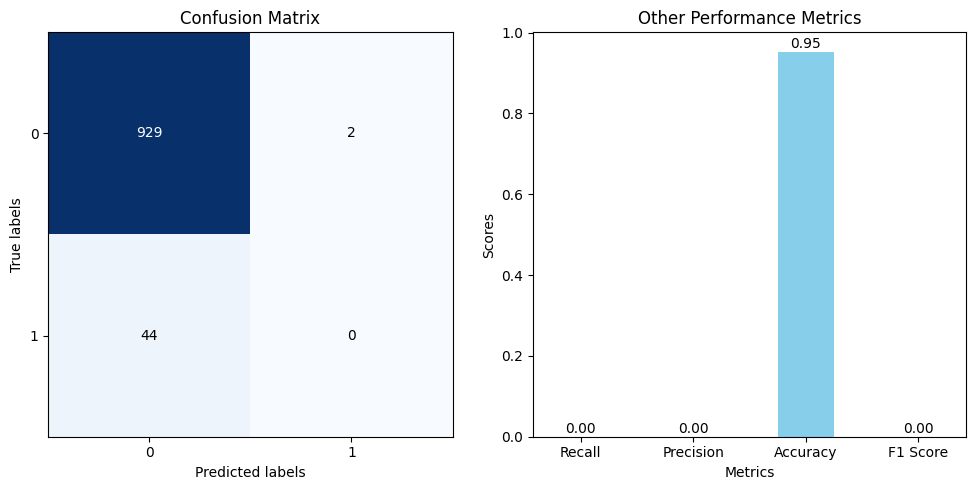

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [10, 100, 1000],
    'min_samples_leaf': [2, 4, 6]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rc = recall_score(y_test, y_pred)
pc = precision_score(y_test, y_pred)
acs = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# 
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
axes[0].imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')
classes = ['0', '1']
ticks = np.arange(len(classes))
axes[0].set_xticks(ticks)
axes[0].set_yticks(ticks)
axes[0].set_xticklabels(classes)
axes[0].set_yticklabels(classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        axes[0].text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center",
                     color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

# Other Metrics Plot
metrics_names = ['Recall', 'Precision', 'Accuracy', 'F1 Score']
metrics_values = [rc, pc, acs, f1]

bar_width = 0.5
index = np.arange(len(metrics_names))

axes[1].bar(index, metrics_values, bar_width, color='skyblue')
for i, value in enumerate(metrics_values):
    axes[1].text(i, value + 0.01, f'{value:.2f}', ha='center')

axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Scores')
axes[1].set_title('Other Performance Metrics')
axes[1].set_xticks(index)
axes[1].set_xticklabels(metrics_names)

plt.tight_layout()
plt.show()

Best hyperparameters: {'C': 1, 'class_weight': {0: 1, 1: 9}, 'degree': 2}


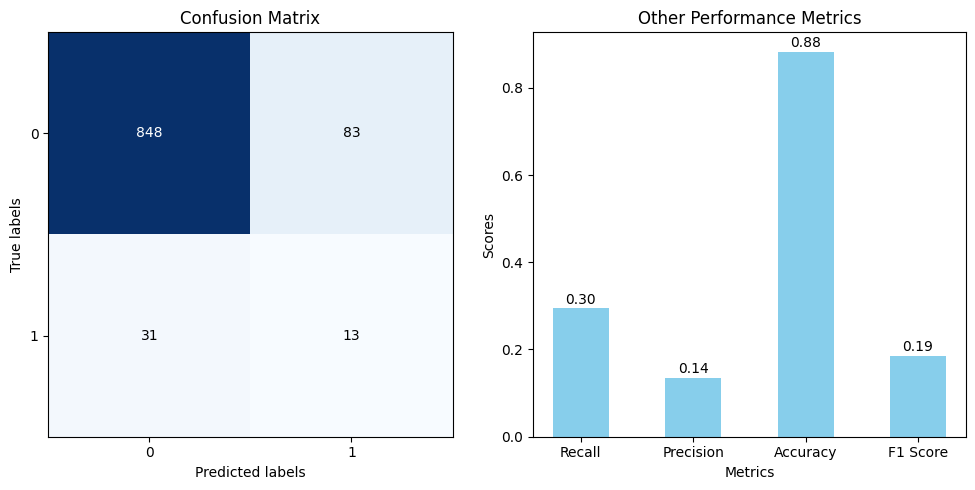

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 2],
    'degree': [2, 3, 4],
    'class_weight': ['balanced', {0: 1, 1: 9}, {0: 1, 1: 5}, {0: 1, 1: 6}]
}
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rc = recall_score(y_test, y_pred)
pc = precision_score(y_test, y_pred)
acs = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
axes[0].imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')
classes = ['0', '1']
ticks = np.arange(len(classes))
axes[0].set_xticks(ticks)
axes[0].set_yticks(ticks)
axes[0].set_xticklabels(classes)
axes[0].set_yticklabels(classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        axes[0].text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center",
                     color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

# Other Metrics Plot
metrics_names = ['Recall', 'Precision', 'Accuracy', 'F1 Score']
metrics_values = [rc, pc, acs, f1]

bar_width = 0.5
index = np.arange(len(metrics_names))

axes[1].bar(index, metrics_values, bar_width, color='skyblue')
for i, value in enumerate(metrics_values):
    axes[1].text(i, value + 0.01, f'{value:.2f}', ha='center')

axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Scores')
axes[1].set_title('Other Performance Metrics')
axes[1].set_xticks(index)
axes[1].set_xticklabels(metrics_names)

plt.tight_layout()
plt.show()